In [31]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch10 N차원 배열 다루기</font>

- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 C언어로 구현되어 고성능 수치 계산 패키지

# 1절. 넘파이 패키지

In [32]:
import numpy as np

np.__version__

'1.23.5'

In [7]:
# np.arange(from, stop, step) : from부터 stop앞까지 step씩 증감한 정수값을 배열로 생성

a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [10]:
from numpy import arange

a = arange(15).reshape(3, 5)  # 3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [11]:
type(a)  # a변수의 타입

numpy.ndarray

In [12]:
a.dtype  # a배열 요소의 type

dtype('int32')

In [13]:
a.dtype.name

'int32'

In [14]:
a.itemsize  # 한 요소의 bytesize

4

In [15]:
a.ndim  # 차원수(축수)

2

In [16]:
a.size  # 배열 요소 갯수

15

In [17]:
a.shape  # 배열 구조 (튜플)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [19]:
print('구조변경 전', a, sep = '\n')
a.shape = (5, 3)
print('구조변경 후', a, sep = '\n')

구조변경 전
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [26]:
# 타입변경(X)

a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
a.dtype

dtype('int32')

In [28]:
a.itemsize

4

In [29]:
a.size, a.shape  # 12개 요소 3행4열

(12, (3, 4))

In [31]:
a.dtype = np.int64  # a 배열 읽을 때 64bit씩 읽는다
a.dtype

dtype('int64')

In [32]:
a.itemsize

8

In [33]:
a.size, a.shape

(6, (3, 2))

In [34]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [35]:
# 타입변경(O)

a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
a = a.astype(np.int64)  # a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [37]:
a.dtype

dtype('int64')

In [38]:
a.itemsize

8

In [39]:
a.size, a.shape

(12, (3, 4))

In [40]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [41]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [42]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장

In [43]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [44]:
import pickle

with open('data/ch10_a.pkl', 'wb') as f :
    pickle.dump(a, f)

In [46]:
with open('data/ch10_a.pkl', 'rb') as f :
    load_a = pickle.load(f)

In [47]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [48]:
a == load_a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [49]:
np.all(a == load_a)  # a 넘파이 배열과 load_a 넘파이 배열이 같은지

True

In [50]:
np.save('data/ch10_a.npy', a)

In [52]:
load_a2 = np.load('data/ch10_a.npy')
np.all(a == load_a2)

True

# 2절. 넘파이 배열

- array()함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 랜덤값을 갖는 함수들 ...

## 2.1 array() 함수로 넘파이 배열 만들기

- array(list나 tuple, dtype = np.xxx, copy = True/False)

In [56]:
a = np.array([2, 4, 6], dtype = np.int8)  # 정수의 기본 타입은 int32 / 실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [58]:
a[0], a[1], a[2]

(2, 4, 6)

In [59]:
a.dtype

dtype('int8')

In [62]:
b = np.array([[1.3, 2.4], [4, 5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [63]:
b.dtype

dtype('float64')

In [65]:
b = np.array([[1.3, 2.4], [4, 5]], dtype = np.float32).reshape(1, 4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [66]:
b.itemsize

4

In [67]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [68]:
l = [[1, 2], [3.4, 4.5]]

for row in l :
    for data in row :
        print(data, end = '\t')
    print()

1	2	
3.4	4.5	


In [69]:
c = np.array([[1, 2], [3.4, 4.5]], dtype = np.float16)

for i, row in enumerate(c) :
    for j, item in enumerate(row) :
        print('{}행{}열:{}'.format(i, j, item), end = '\t')
    print()

0행0열:1.0	0행1열:2.0	
1행0열:3.400390625	1행1열:4.5	


In [72]:
c = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], dtype = np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [73]:
c[0, 3]

4

In [75]:
c[:, 1:3]  # 모든행, 1열부터 3열앞까지

array([[2, 3],
       [7, 8]], dtype=int16)

In [76]:
c[0, 2:5]  # 0행 2열~4열까지

array([3, 4, 5], dtype=int16)

In [77]:
# 모든행의 맨 마지막 열만 추출

c[:, -1]

array([ 5, 10], dtype=int16)

In [79]:
# 모든행의 맨 마지막 열을 제외한 추출

c[:, :-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [86]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=False) # d=c 얕은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
c주소=2498523479376, d주소:2498523479376


In [87]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=True) # d=c.copy() 깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소=2498523729808, d주소:2498523741328


## 2.2 기본값이 있는 배열만들기

- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 기본값
- np.empty(tup) : 요소들이 임의의 값 (메모리 상태에 따라 달라짐)
- 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype속성 따라 지정 가능

In [81]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [82]:
x = np.ones((3, 5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [84]:
np.full((2, 5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [85]:
np.empty((2, 5))

array([[nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

## 2.3 랜덤값을 갖는 배열 만들기

- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low = 0, high = 1.0, size = tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc = 0, scale = 1.0, size = tup) : 평균loc와 표준편차scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생 (난수 n개)
- np.random.randn(n) : 표준정규분포(평균이 0, 표준편차가 1인 정규분포)의 1차원 난수 배열 발생 (난수 n개)
- cf. np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

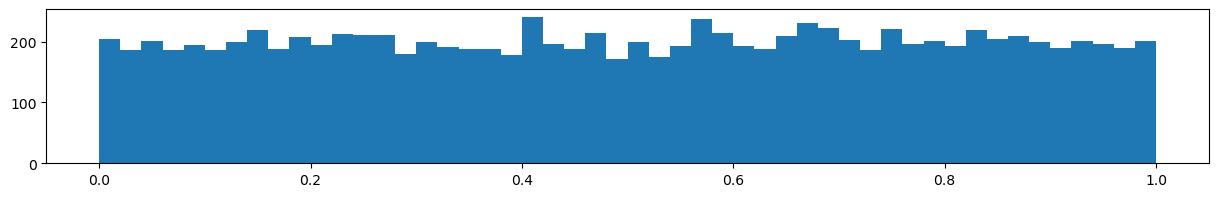

In [91]:
import matplotlib.pyplot as plt

x = np.random.rand(10000)
plt.figure(figsize = (15, 2))  # 그래프 크기 figsize = (가로, 세로)
plt.hist(x, bins = 50)
plt.show()

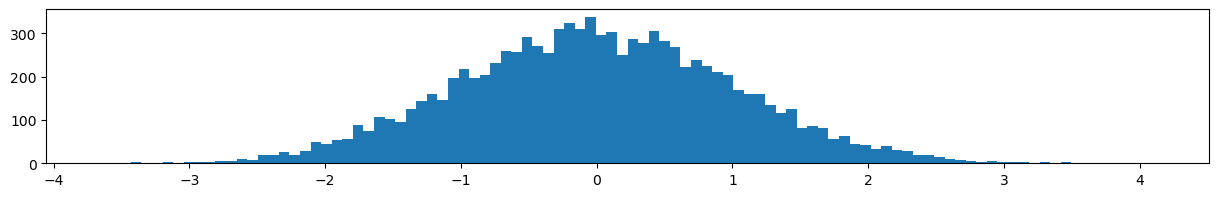

In [93]:
x = np.random.randn(10000)
plt.figure(figsize = (15, 2))  # 그래프 크기 figsize = (가로, 세로)
plt.hist(x, bins = 100)
plt.show()

In [95]:
# 2차원 난수 배열

np.random.seed(12)  # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2, 5))  # 0부터 1미만 균등분포 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [97]:
np.random.uniform(-1, 10, (2, 5))  # -1부터 10미만의 균등분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [98]:
np.random.normal(10, 2, (2, 5))  # 평균 10, 표준편차 2인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기

- np.arange(from, stop, by, dtype) : from부터 stop앞까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from부터 to까지(to포함) count개 숫자를 1차원 배열

In [99]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [100]:
# linspace : 많은 수의 점들을 생성

x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

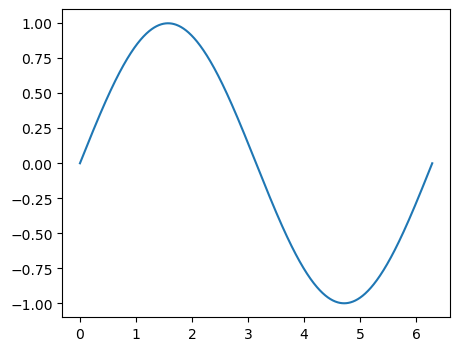

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 4))
plt.plot(x, y)
plt.show()

In [103]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [104]:
np.arange(10, 30, 3, dtype = np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기

- reshape([면수,] 행수, 열수) : -1이 올 수도
- resize([면수,] 행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환
- 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [5]:
a = np.random.random((2, 3))
a

array([[0.02407188, 0.37775436, 0.7229673 ],
       [0.12069681, 0.83478516, 0.89374686]])

In [6]:
a = np.round(a * 10)  # round : 반올림 / floor : 내림 / ceil : 올림
a

array([[0., 4., 7.],
       [1., 8., 9.]])

In [7]:
a = a.reshape(3, 2)
a

array([[0., 4.],
       [7., 1.],
       [8., 9.]])

In [8]:
a.reshape(2, -1)  # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[0., 4., 7.],
       [1., 8., 9.]])

In [9]:
a.reshape(-1, 1)

array([[0.],
       [4.],
       [7.],
       [1.],
       [8.],
       [9.]])

In [10]:
a.resize((2, 3))  # 결과를 출력하지 않는 함수는 배열 자체를 바꿈 -1불가

In [11]:
a

array([[0., 4., 7.],
       [1., 8., 9.]])

In [12]:
import seaborn as sns
sns.load_dataset('iris')[::25]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica
125,7.2,3.2,6.0,1.8,virginica


In [13]:
a.T  # 전치행렬(행과 열을 뒤바뀐 행렬)

array([[0., 1.],
       [4., 8.],
       [7., 9.]])

In [14]:
a.transpose()  # 전치행렬

array([[0., 1.],
       [4., 8.],
       [7., 9.]])

## 2.6 배열 인쇄

In [16]:
# 배열이 커서 출력이 안 될 경우

print(np.arange(1001))

[   0    1    2 ...  998  999 1000]


In [17]:
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [18]:
# 배열 출력 옵션 변경 (인쇄할 사이즈를 10000, 최대치, 무한대)

import sys  # 최대치 : sys.maxsize

# np.set_printoptions(threshold = 10000)
# np.set_printoptions(threshold = sys.maxsize)
np.set_printoptions(threshold = np.inf)  # np.inf : 무한대
# 커널 재시작시 threshold값 복귀

In [21]:
# np.arange(10000).reshape(100, 100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본 연산 동작

### 1) 배열의 요소별 연산

In [19]:
a = np.array([10, 20, 30, 40], dtype = np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [22]:
c = a + b
c, c.dtype

(array([10, 21, 32, 43]), dtype('int32'))

In [23]:
a += b  # a = a + b
a

array([10, 21, 32, 43], dtype=int8)

In [24]:
a = a + b
a, a.dtype

(array([10, 22, 34, 46]), dtype('int32'))

In [25]:
a = np.array([10, 20, 30, 40], dtype = np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [26]:
a * b

array([  0,  20,  60, 120])

In [27]:
a ** b  # ** 승연산 a의 b승

array([    1,    20,   900, 64000], dtype=int32)

In [28]:
a < 30

array([ True,  True, False, False])

In [30]:
print(a[[True,  True, False, False]])
print(a[a<30])

[10 20]
[10 20]


### 2) 행렬(2차원 배열)의 곱(@, dot함수)  cf *(요소별 곱)

In [34]:
a = np.array([[1, 2], [0, 1]])
b = np.array([[2, 0], [3, 4]])

a, b

(array([[1, 2],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [35]:
a * b

array([[2, 0],
       [0, 4]])

In [37]:
a @ b

array([[8, 8],
       [3, 4]])

In [39]:
print('요소별 곱 a * b = ', a * b, sep = '\n')
print('행렬곱 a @ b = ', a @ b, sep = '\n')
print('행렬곱 a.dot(b) = ', a.dot(b), sep = '\n')
print('행렬곱 b @ a = ', b @ a, sep = '\n')
print('행렬곱 b.dot(a) = ', b.dot(a), sep = '\n')

요소별 곱 a * b = 
[[2 0]
 [0 4]]
행렬곱 a @ b = 
[[8 8]
 [3 4]]
행렬곱 a.dot(b) = 
[[8 8]
 [3 4]]
행렬곱 b @ a = 
[[ 2  4]
 [ 3 10]]
행렬곱 b.dot(a) = 
[[ 2  4]
 [ 3 10]]


In [42]:
# n행 n열의 단위행렬 : np.eye(n) : A @ 단위행렬 = A

np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3) 복합 대입연산자 사용

- 배열에서는 a = a + b와 a += b 다소 다르게 작동

In [41]:
a = np.ones((2, 3), dtype = int)  # 2행3열 int32배열
a, a.dtype

(array([[1, 1, 1],
        [1, 1, 1]]),
 dtype('int32'))

In [43]:
b = np.random.random( (2, 3) ) # 2행3열 float64 배열
b, b.dtype

(array([[0.60602856, 0.38671374, 0.41161766],
        [0.44647884, 0.18646517, 0.97688127]]),
 dtype('float64'))

In [44]:
a += b # a + b를 기존 a에 넣는다

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [45]:
b += a
b

array([[1.60602856, 1.38671374, 1.41161766],
       [1.44647884, 1.18646517, 1.97688127]])

In [46]:
a = a + b # a + b를 새로운 변수 a 할당
a

array([[2.60602856, 2.38671374, 2.41161766],
       [2.44647884, 2.18646517, 2.97688127]])

### 4) 배열 축별 집계

- sum, min, max, mean, var(분산), std(표준편차), argmax(최대값의 인덱스)

In [67]:
print('전체합 :', np.sum(a), a.sum())
print('전체최소 :', np.min(a), a.min())
print('전체최대 :', np.max(a), a.max())
print('전체평균 :', np.mean(a), a.mean())
print('전체분산 :', np.var(a), a.var())
print('전체표준편차 :', np.std(a), a.std())

전체합 : 19 19
전체최소 : 1 1
전체최대 : 4 4
전체평균 : 2.375 2.375
전체분산 : 0.734375 0.734375
전체표준편차 : 0.8569568250501305 0.8569568250501305


In [66]:
# 2차원 배열의 축별 집계

a = np.array([[2, 2, 2, 3], [4, 3, 2, 1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [54]:
# axis = 0 : 1축을 고정하고 0축(행)들의 합 / axis = 1 : 0축을 고정하고 1축(열)들의 합

print('a의 행별 합 :', a.sum(), np.sum(a))
print('a의 행별 합 :', a.sum(axis = 0), np.sum(a, axis = 0))
print('a의 행별 합 :', a.sum(axis = 1), np.sum(a, axis = 1))

a의 행별 합 : 19 19
a의 행별 합 : [6 5 4 4] [6 5 4 4]
a의 행별 합 : [ 9 10] [ 9 10]


In [56]:
print('a의 행별 최대값 위치 :', a.argmax(), np.argmax(a))
print('a의 행별 최대값 위치 :', a.argmax(axis = 0), np.argmax(a, axis = 0))
print('a의 행별 최대값 위치 :', a.argmax(axis = 1), np.argmax(a, axis = 1))

a의 행별 최대값 위치 : 4 4
a의 행별 최대값 위치 : [1 1 0 0] [1 1 0 0]
a의 행별 최대값 위치 : [3 0] [3 0]


In [57]:
# 3차원 배열의 축별 집계

b = np.arange(24).reshape(2, 3, 4)  # 2면 3행 4열
b, b.ndim

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 3)

In [58]:
# axis = 0 : 1축과 2축을 고정하고 0축(0면, 1면)들의 합
# axis = 1 : 0축과 2축을 고정하고 1축(0행, 1행, 2행)들의 합
# axis = 2 : 0축과 1축을 고정하고 2축(0열, 1열, 2열, 3열)들의 합

print('b의 행별 합 :', b.sum(), np.sum(b))
print('b의 행별 합 :', b.sum(axis = 0), np.sum(b, axis = 0))
print('b의 행별 합 :', b.sum(axis = 1), np.sum(b, axis = 1))
print('b의 행별 합 :', b.sum(axis = 2), np.sum(b, axis = 2))

b의 행별 합 : 276 276
b의 행별 합 : [[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]] [[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]
b의 행별 합 : [[12 15 18 21]
 [48 51 54 57]] [[12 15 18 21]
 [48 51 54 57]]
b의 행별 합 : [[ 6 22 38]
 [54 70 86]] [[ 6 22 38]
 [54 70 86]]


## 2.8 그 외 요소별 계산하는 범용함수들

- 메모리나 시간을 효율적으로 사용할 수 있음
- np.add(A, B, C) : C = np.add(A, B) = A + B
- np.subtract(A, B, C) : C = np.subtract(A, B) = A - B
- np.multiply(A, B, C) : C = np.multiply(A, B) = A * B
- np.sqrt(배열) : 요소별 제곱근  cf. math.sqrt(스칼라값)

In [74]:
a = np.array([1, 2])
b = np.array([3, 4])
c = a + b
c

array([4, 6])

In [61]:
np.add(a, b, c)

array([4, 6])

In [75]:
c = np.add(a, b)
c

array([4, 6])

In [76]:
np.subtract(a, b)

array([-2, -2])

In [77]:
np.multiply(a, b)

array([3, 8])

In [64]:
# np.sqrt(배열 또는 스칼라값) / math.sqrt(스칼라값)

a, np.sqrt(a), np.sqrt(4)

(array([1, 2]), array([1.        , 1.41421356]), 2.0)

In [65]:
import math

math.sqrt(4)
math.sqrt(a)

TypeError: only size-1 arrays can be converted to Python scalars

## 2.9 브로드 케스팅

- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능

In [70]:
# 1차원 배열

a = np.array([1, 2, 3])
b = np.array([10, 10, 10])
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [71]:
# 1차원 배열 브로드케스팅

a = np.array([1, 2, 3])
b = np.array([10])
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [72]:
# 2차원 배열 브로드케스팅

a = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])  # 4행 3열
b = np.array([1, 2, 3])  # 3열
a + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [79]:
a = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])  # 4행 3열
b = np.array([[1], [2], [3], [4]])  # 4행 1열
a + b

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [80]:
b = np.array([1, 2, 3, 4]) # 4열 -> (축증가) -> 4행1열

# b_1 = b.reshape(4, 1) # 방법1
b_1 = b[:, np.newaxis] # 방법2
# b_1 = np.expand_dims(b, axis=1) # 방법3
b_1

array([[1],
       [2],
       [3],
       [4]])

In [81]:
a + b[:, np.newaxis]

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [94]:
# a와 b의 모든 쌍의 조합에 대해 계산하고 싶을 때

a = np.array([2, 3, 4, 5])
b = np.array([10, 20, 30, 40])
a + b[:, np.newaxis]

array([[12, 13, 14, 15],
       [22, 23, 24, 25],
       [32, 33, 34, 35],
       [42, 43, 44, 45]])

In [95]:
a[:, np.newaxis] + b

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [84]:
ax, bx = np.ix_(a, b)
ax + bx

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

# 3절. 배열 합치기 / 분리하기

- 슬라이싱
- 두 배열을 합치는 함수
- r_, c_
- 두 배열을 분리하는 함수

## 3.1 인덱싱과 슬라이싱

- 인덱싱에는 없는 인덱스 사용시 에러
- 슬라이싱에는 없는 인덱스 사용시 끝까지
- 음수 인덱스는 끝에서부터

In [86]:
a = np.arange(10) * 3
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [87]:
a[20]

IndexError: index 20 is out of bounds for axis 0 with size 10

In [96]:
a = np.arange(20).reshape(5, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [97]:
a[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [98]:
# 모든 행의 마지막 열 앞까지 (모든 행 = 모든 0축의 경우 :이나 ...을 반드시 명시)

a[:, 0:-1], a[..., :-1]

(array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]),
 array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]))

In [99]:
# 0~1행까지 모든 열 추출 (모든 열(1축)의 경우 생략 가능 :, ... 사용 가능)

a[0:2, :], a[:2, ...], a[:2]

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

In [102]:
a = np.arange(20).reshape(5, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [135]:
# 마지막행의 데이터를 2차원으로 변경 → 4행 1열

a[-1].reshape(4, 1), a[-1][:, np.newaxis], np.expand_dims(a[-1], axis = 1)

(array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]))

In [137]:
a[-1:]

array([[16, 17, 18, 19]])

## 3.2 두 배열을 합치는 함수

- **vstack(tup) : 아래로 추가하는 방식**
- **hstack(tup) : 옆으로 추가하는 방식**
- **dstack(tup) : 마지막 축(열)을 쌓아 합침 (차원증가)**

In [144]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
v = np.vstack((a, b))
print('vstack 아래로 합치기', v, v.shape, sep = '\n')
h = np.hstack((a, b))
print('hstack 옆으로 합치기', h, h.shape, sep = '\n')
d = np.dstack((a, b))
print('dstack 축을 depth로 합치기', d, d.shape, sep = '\n')

vstack 아래로 합치기
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 합치기
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [145]:
c = np.arange(24).reshape(2, 3, 4)
a, b = c[0], c[1]
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [146]:
v = np.vstack((a, b))
print('vstack 아래로 합치기 ', v, v.shape, sep = '\n')
h = np.hstack((a, b))
print('hstack 옆으로 합치기 ', h, h.shape, sep = '\n')
d = np.dstack((a, b))
print('dstack 축을 depth로 합치기 ', d, d.shape, sep = '\n')

vstack 아래로 합치기 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
(6, 4)
hstack 옆으로 합치기 
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
(3, 8)
dstack 축을 depth로 합치기 
[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
(3, 4, 2)


In [147]:
np.concatenate((a, b), axis = 0)  # vstack( (a, b) )

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [148]:
np.concatenate((a, b), axis = 1)  # hstack( (a,b) )

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- **column_stack(tup) : 열단위로 합침**
- **row_stack(tup) : 행단위로 합침 == vstack(tup)**
- **stack(tup, axis) : axis속성에 따라 배열합침 axis 음수차원 가능**

In [149]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([7, 8, 9])
np.column_stack((a, b, c))

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [150]:
np.row_stack((a, b, c))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [151]:
c = np.arange(24).reshape(2, 3, 4)
a, b = c[0], c[1]
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [152]:
np.stack((a, b), axis=0)  # 0면 a, 1면 b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [153]:
np.stack((a, b), axis = 1)  # 행(1축)끼리 합쳐서 면을 이룸

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [154]:
np.stack((a, b), axis = -1)  # a의 행과 b의 행을 열로 합쳐서 면을 이룸

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_

In [140]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 5, 5, 5])
c = np.array([6, 6, 6, 6])
np.r_[a, b, c]  # 행 합치기

array([1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 6])

In [142]:
np.r_[[a], [b], [c]]

array([[1, 2, 3, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

In [143]:
np.c_[a, b, c]  # 컬럼 쌓기

array([[1, 5, 6],
       [2, 5, 6],
       [3, 5, 6],
       [4, 5, 6]])

## 3.4 배열 분리하는 함수

- **vsplit(ary, 정수나 벡터) : 첫번째 축을 따라 분할**
- **hsplit(ary, 정수나 벡터) : 두번째 축을 따라 분할**
- **dsplit(ary, 정수나 벡터) : depth따라 나눔 (3차원 이상에서만 동작)**
    - 정수 n : n개 분리
    - [n] : n번째 인덱스를 기점으로 분리
    - [n, m] : n번째, m번째 인덱스를 기점으로 분리

In [155]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [156]:
a_vsplit = np.vsplit(a, 3)  # 2개로 분리는 에러
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [159]:
np.vsplit(a, [2])  # [2] : 2번 인덱스를 기점으로 분리

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [164]:
a_hsplit = np.hsplit(a, 2)  # 3개로 분리는 에러
a_hsplit

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [168]:
np.hsplit(a, [1, 3])  # [1, 3] : 1번, 3번 인덱스를 기점으로 분리

[array([[0],
        [4],
        [8]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]),
 array([[ 3],
        [ 7],
        [11]])]

- **split(ary, 갯수나 인덱스벡터, axis)**
    - axis = 0 : vsplit() 동일
    - axis = 1 : hsplit() 동일
    - axis = 2 : dsplit() 동일  (3차원 이상에서만 동작)
- **array_split(ary, 갯수나 인덱스벡터, axis)**
    - split과의 차이점은 나눠지지 않은 정수로도 사용 가능

In [169]:
a = np.arange(20).reshape(2, 10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [170]:
np.split(a, 2, axis = 0)  # 행분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [172]:
np.split(a, 5, axis = 1)  # 열분리

[array([[ 0,  1],
        [10, 11]]),
 array([[ 2,  3],
        [12, 13]]),
 array([[ 4,  5],
        [14, 15]]),
 array([[ 6,  7],
        [16, 17]]),
 array([[ 8,  9],
        [18, 19]])]

In [173]:
np.array_split(a, 3, axis = 1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]

In [186]:
b = np.arange(24).reshape(1, 2, 3, 4)
b

array([[[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]])

In [188]:
np.dsplit(b, 3)

[array([[[[ 0,  1,  2,  3]],
 
         [[12, 13, 14, 15]]]]),
 array([[[[ 4,  5,  6,  7]],
 
         [[16, 17, 18, 19]]]]),
 array([[[[ 8,  9, 10, 11]],
 
         [[20, 21, 22, 23]]]])]

In [189]:
np.split(b, 3, axis = 2)

[array([[[[ 0,  1,  2,  3]],
 
         [[12, 13, 14, 15]]]]),
 array([[[[ 4,  5,  6,  7]],
 
         [[16, 17, 18, 19]]]]),
 array([[[[ 8,  9, 10, 11]],
 
         [[20, 21, 22, 23]]]])]

In [194]:
np.split(b, 4, axis = -1)

[array([[[[ 0],
          [ 4],
          [ 8]],
 
         [[12],
          [16],
          [20]]]]),
 array([[[[ 1],
          [ 5],
          [ 9]],
 
         [[13],
          [17],
          [21]]]]),
 array([[[[ 2],
          [ 6],
          [10]],
 
         [[14],
          [18],
          [22]]]]),
 array([[[[ 3],
          [ 7],
          [11]],
 
         [[15],
          [19],
          [23]]]])]